In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from data_proc import read_data
%matplotlib inline

data, labels = read_data('hochgerner')


Text(0, 0.5, 'PC2')

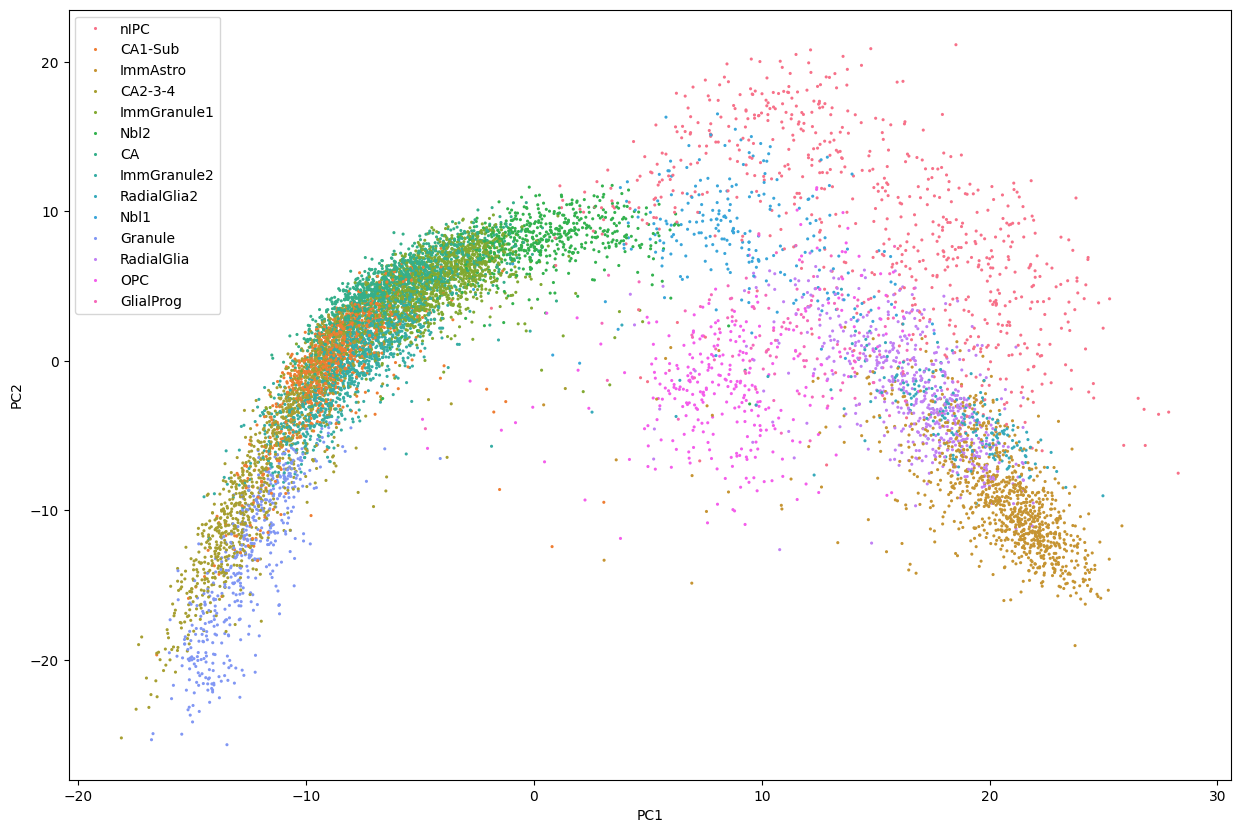

In [2]:
#visualize PCA result
plt.figure(figsize=(15,10))
sns.scatterplot(x=data[:,0], y=data[:,1], linewidth = 0, s=5, hue=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')

##  GraphDR: nonlinear dimensionality reduction that preserves linear interpretability

GraphDR is a nonlinear dimensionality reduction method that preserves the linear interpretability while improving on cell type representation quality. GraphDR combines the advantages of linear methods such as PCA and nonlinear methods such as t-SNE. Unlike t-SNE, GraphDR is also suitable for comparison across datasets.

In [11]:
#write and apply your own GraphDR implementation here!
from GraphDR import graphdr
graphdr_data  = graphdr(data, lambda_=10, no_rotation=True)

torch.Size([10000, 20])


Text(0, 0.5, 'GraphDR 2')

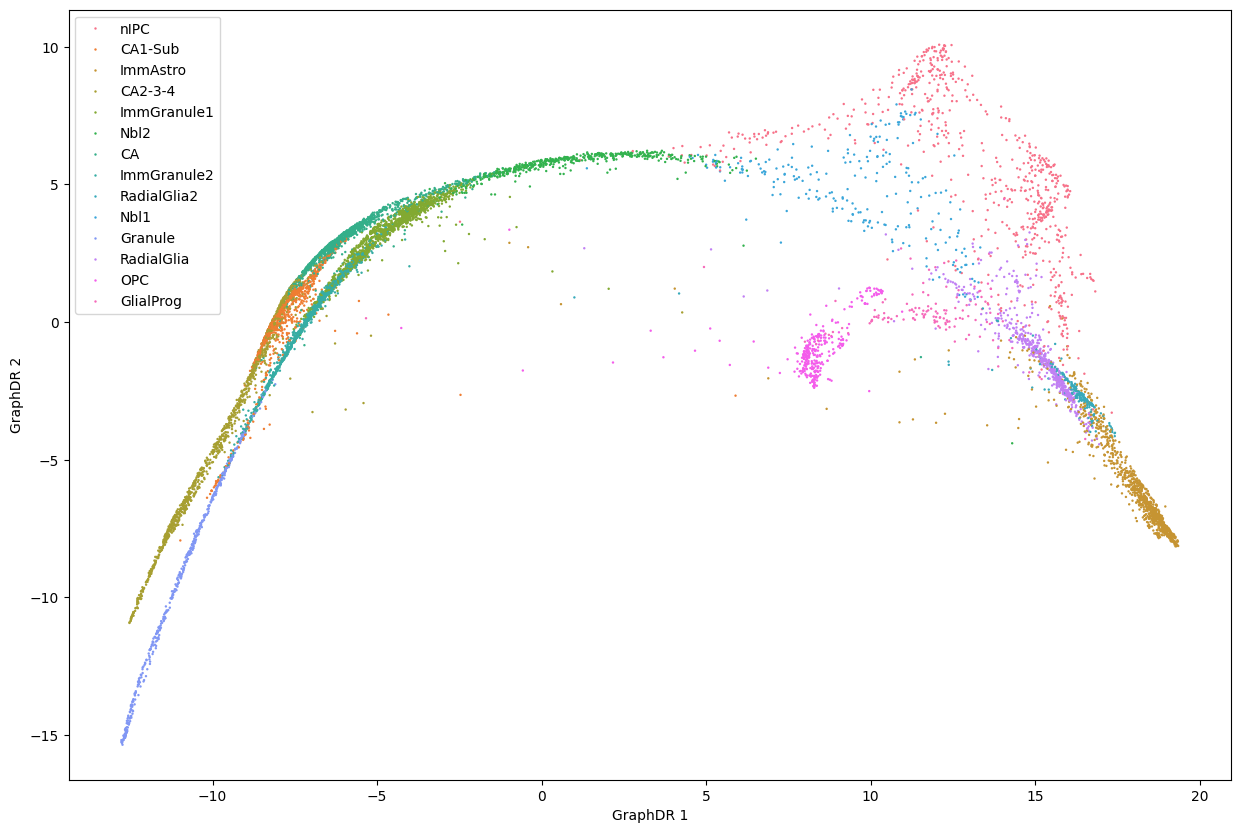

In [4]:
#compare your graphdr output with this one, it should look similar (remember to adjust lambda_ and see its effect)

plt.figure(figsize=(15,10))
sns.scatterplot(x=graphdr_data[:,0], y=graphdr_data[:,1], linewidth = 0, s=3, hue=labels)
plt.xlabel('GraphDR 1')
plt.ylabel('GraphDR 2')

In [5]:
import plotly.express as px
x = graphdr_data[:, 0]
y = graphdr_data[:, 1]
z = graphdr_data[:, 2]
px.scatter_3d(x=x, y=y, z=z, color=labels, size_max=0.01)

In [12]:
from ipywidgets import interact, FloatSlider
import plotly.express as px

sel_num = 10000
sel_data = data[:sel_num, :]
sel_labels = labels[:sel_num]
def plot_graphdr_3d(lambda_=2):
    lambda_val = 10**lambda_
    graphdr_data  = graphdr(sel_data, lambda_=lambda_val, no_rotation=True)
    
    fig = px.scatter_3d(x=graphdr_data[:,0], y=graphdr_data[:,1], z=graphdr_data[:,2], size_max=0.001, color=sel_labels)
    fig.show()

interact(
    plot_graphdr_3d,
    lambda_=FloatSlider(min=-5, max=5, step=0.1, value=2, description="lambda"),
)

interactive(children=(FloatSlider(value=2.0, description='lambda', max=5.0, min=-5.0), Output()), _dom_classes…

<function __main__.plot_graphdr_3d(lambda_=2)>